<html>
    <head>
    <h2>Radio Frequency Data Generation</h2>
    </head>
    <body>
    <p>The content of this tutorial was developed by Team 3 as part of an engineering project management class. Here we will discuss the first part of a three part series for creating a signal classification neural network. The goal of these tutorials is to walk the user through all the stages of creating a neural network capable of identifying the underlying communication modulation type and signal metrics.</p>
    <p>Tutorial 1 focuses on generating training data utilizing the Python library modem provided by [our stakeholder]. The training data is generated automatically through the code produced below. In this tutorial we'll explain each portion of the code and remark on what each function achieves, why it is being used, and the greater context for signal generation and classification.</p>
    </body>
</html>

## Prerequisites

**1. Basic Programming Knowledge:**
Understanding of programming concepts and syntax in Python. Ability to write and execute code in a Python environment.

**2. Python Environment Setup:**
Python installed on the user's machine (preferably Python 3.x). Familiarity with Python's package manager pip to install libraries.

 Having Python set up with pip will enable to install these dependencies.

**3. Knowledge of Python Libraries:**
Experience with NumPy for numerical computing. Experience with Matplotlib for data visualization.


NumPy is essential for handling arrays and matrices, which are fundamental in signal processing, while Matplotlib is used for plotting signals and visualizing data.

**4. Signal Processing Basics:**
Understanding of basic signal processing concepts. Familiarity with terms like modulation, signal-to-noise ratio (SNR), and Gaussian noise.


The tutorial covers the generation and visualization of modulated signals, which are key concepts in signal processing. A foundational knowledge will help in comprehending the tutorial's content.

**5. Mathematical Proficiency:**
Comfort with mathematical concepts, particularly complex numbers and basic calculus.

Signal processing often involves mathematics, and a good grasp of relevant math will help in understanding the manipulation and representation of signals.

**6. Version Control Systems:**
Basic understanding of Git and GitHub for code versioning and collaboration.

**7. Integrated Development Environment (IDE) or Text Editor:**
Familiarity with an IDE (like PyCharm, Visual Studio Code) or a text editor equipped for Python.

**8. Google Colab or Jupyter Notebook Experience:**
Experience with running Python notebooks in Google Colab or Jupyter Notebook if the tutorial is to be followed there.

Now that we are abreast with the pre-requisites, we can start. To begin we will outline that python libraries used in this tutorial. We'll briefly explain their function and significance.


<html>
    <body>
        <b>Imports</b>
        <p><i><b>import sys: </b>Allows Python to manipulate different parts of the its runtime interpreter.</i></p>
        <p><i><b>numpy as np: </b>Allows Python to utilize a diverse collection of functions and data structures used for advanced math.</i></p>
    </body>
</html>

In [ ]:
!rm -rf src
!git clone https://github.com/aferraro-vt/src.git


Cloning into 'src'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 14 (delta 2), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (14/14), 10.82 KiB | 2.70 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [ ]:
###########
# IMPORTS #
###########
#

import sys
sys.path.append("/content/src/src")
import numpy as np
#import src.modems as modems
import modems
import matplotlib.pyplot as plt
#import src.channels as channels
import channels
from scipy.stats import norm
from scipy.special import erfc

ModuleNotFoundError: No module named 'modems'

<html>
    <body>
        <b>Utility Functions</b>
        <p>The following section of functions below are a collection of functions that contain trivial code to generate the plots above. These are not important or novel, however the code is reproduced below for the benefit of the reader.</p>
    </body>
        
</html>

In [ ]:
#############
# FUNCTIONS #
#############
#
# Basic plot function
def plotSignal(signal):

    # Initialize figure
    plt.figure(figsize=(5.0, 5.0))
    plt.title('Symbol Constellation Plot', fontsize=20)
    plt.xlabel('In-Phase Symbol Component')
    plt.ylabel('Quadrature Symbol Component')

    # Set figure limits
    plt.xlim([-2.0, 2.0])
    plt.ylim([-2.0, 2.0])

    # Set grids for plot
    plt.grid();

    # Plot parts of the signal on the figure
    for i,x in enumerate(signal.symb_table):
        plt.annotate(format(i, '01b'), xy=[x.real, x.imag], xytext=[-15.0, -15.0], textcoords='offset points')
        plt.plot(x.real, x.imag, '*')

    plt.show()

def plotCosinePulsesReal(pulses, samples, totalSamples):

    # Initialize figure
    plt.figure(figsize=(5.0, 5.0))
    plt.title('In-Phase Component of Generated Raised Cosine Signal', fontsize=20)
    plt.ylabel('Amplitude')
    plt.xlabel('Sample Number')

    # Set figure limits
    plt.ylim([-1.0, 1.0])

    # Set grids for plot
    plt.grid();

    # Plot real portions of raised cosine pulses
    plt.plot(pulses.real, '-*')
    plt.stem(np.arange(samples,(totalSamples+1)*samples,samples), pulses[samples:(totalSamples+1)*samples:samples].real, linefmt='--r', markerfmt='ro')

    plt.show()

def plotCosinePulsesImaginary(pulses, samples, totalSamples):

    # Initialize figure
    plt.figure(figsize=(5.0, 5.0))
    plt.title('Quadrature Component of Generated Raised Cosine Signal', fontsize=20)
    plt.ylabel('Amplitude')
    plt.xlabel('Sample Number')

    # Set figure limits
    plt.ylim([-1.0, 1.0])

    # Set grids for plot
    plt.grid();

    # Plot real portions of raised cosine pulses
    plt.plot(pulses.imag, '-*')
    plt.stem(np.arange(samples,(totalSamples+1)*samples,samples), pulses[samples:(totalSamples+1)*samples:samples].real, linefmt='--r', markerfmt='ro')

    plt.show()

def plotCarrierModulationReal(modulated, samples, totalSamples):

    # Initialize figure
    plt.figure(figsize=(5.0, 5.0))
    plt.title('In-Phase Component of Carrier Modulated Signal', fontsize=20)
    plt.ylabel('Amplitude')
    plt.xlabel('Sample Number')

    # Set figure limits
    plt.ylim([-1.0, 1.0])

    # Set grids for plot
    plt.grid();

    plotAmount = totalSamples * samples
    plt.plot(modulated[0:plotAmount].real, '-*')
    plt.show()

def plotCarrierModulationImaginary(modulated, samples, totalSamples):

    # Initialize figure
    plt.figure(figsize=(5.0, 5.0))
    plt.title('Quadrature Component of Carrier Modulated Signal', fontsize=20)
    plt.ylabel('Amplitude')
    plt.xlabel('Sample Number')

    # Set figure limits
    plt.ylim([-1.0, 1.0])

    # Set grids for plot
    plt.grid();

    plotAmount = totalSamples * samples
    plt.plot(modulated[0:plotAmount].imag, '-*')
    plt.show()

def plotCosinePulsesReal(pulses, samples, totalSamples):

    # Initialize figure
    plt.figure(figsize=(5.0, 5.0))
    plt.title('In-Phase Component of Generated Raised Cosine Signal', fontsize=20)
    plt.ylabel('Amplitude')
    plt.xlabel('Sample Number')

    # Set figure limits
    plt.ylim([-1.0, 1.0])

    # Set grids for plot
    plt.grid();

    # Plot real portions of raised cosine pulses
    plt.plot(pulses.real, '-*')
    plt.stem(np.arange(samples,(totalSamples+1)*samples,samples), pulses[samples:(totalSamples+1)*samples:samples].real, linefmt='--r', markerfmt='ro')

    plt.show()

def plotCosinePulsesImaginary(pulses, samples, totalSamples):

    # Initialize figure
    plt.figure(figsize=(5.0, 5.0))
    plt.title('Quadrature Component of Generated Raised Cosine Signal', fontsize=20)
    plt.ylabel('Amplitude')
    plt.xlabel('Sample Number')

    # Set figure limits
    plt.ylim([-1.0, 1.0])

    # Set grids for plot
    plt.grid();

    # Plot real portions of raised cosine pulses
    plt.plot(pulses.imag, '-*')
    plt.stem(np.arange(samples,(totalSamples+1)*samples,samples), pulses[samples:(totalSamples+1)*samples:samples].real, linefmt='--r', markerfmt='ro')

    plt.show()

def plotFourierTransform(pulses):

    # Variables
    fs = 1.0
    nfft = 256

    plt.psd(pulses, NFFT=nfft, Fs=fs, label='Power Spectral Density')

    plt.show()

def plotCarrierModulationReal(modulated, samples, totalSamples):

    # Initialize figure
    plt.figure(figsize=(5.0, 5.0))
    plt.title('In-Phase Component of Carrier Modulated Signal', fontsize=20)
    plt.ylabel('Amplitude')
    plt.xlabel('Sample Number')

    # Set figure limits
    plt.ylim([-1.0, 1.0])

    # Set grids for plot
    plt.grid();

    plotAmount = totalSamples * samples
    plt.plot(modulated[0:plotAmount].real, '-*')
    plt.show()

def plotCarrierModulationImaginary(modulated, samples, totalSamples):

    # Initialize figure
    plt.figure(figsize=(5.0, 5.0))
    plt.title('Quadrature Component of Carrier Modulated Signal', fontsize=20)
    plt.ylabel('Amplitude')
    plt.xlabel('Sample Number')

    # Set figure limits
    plt.ylim([-1.0, 1.0])

    # Set grids for plot
    plt.grid();

    plotAmount = totalSamples * samples
    plt.plot(modulated[0:plotAmount].imag, '-*')
    plt.show()

def plotDemodulate(receiver, original):

    # Initialize plot
    plt.title('Symbol Constellation Plot')
    plt.xlabel('In-Phase Symbol Component')
    plt.ylabel('Quadrature Symbol Component')
    plt.grid()

    # Limits on plot
    plt.xlim([-2.0, 2.0])
    plt.ylim([-2.0, 2.0])

    # Plot
    plt.plot(receiver.real, receiver.imag, 'b*')
    plt.plot(original.symb_table.real, original.symb_table.imag, 'r*')
    plt.show()

<html>
    <body>
        <b>Amplitude Shift Keying (ASK)</b>
        <p>Amplitude shift keying is a form of signal modulation that encodes digital data as variations of the amplitude of a carrier wave. No changes are made to phase as information is encoded. This is type of modulation is one of the most basic forms of information encoding for an RF signal.</p>
       <p>
       Amplitude can be modulated in various "orders." The number of the order represents the amount of symbols that can be encoded in a single period of an encoded signal. This means a signal with amplitude modulation with an order of 8 can encode 8 unique symbols in a single period. These symbols are a unique string of bits (e.g. 000, 001, 010, 011, ...)
       </p>
    </body>
        
</html>

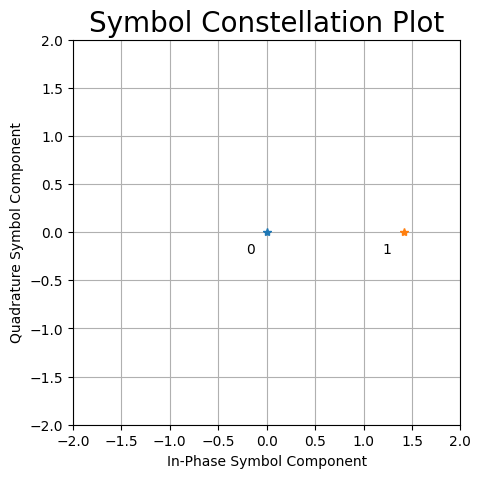

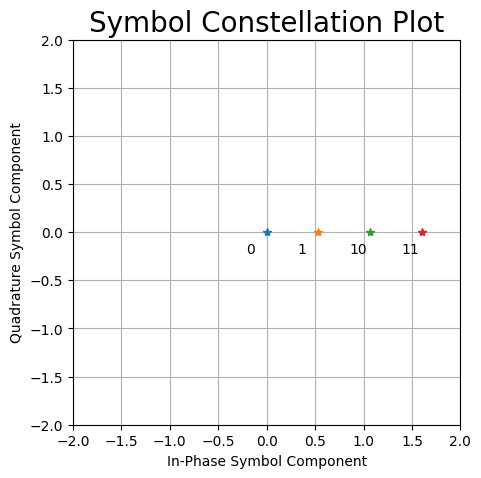

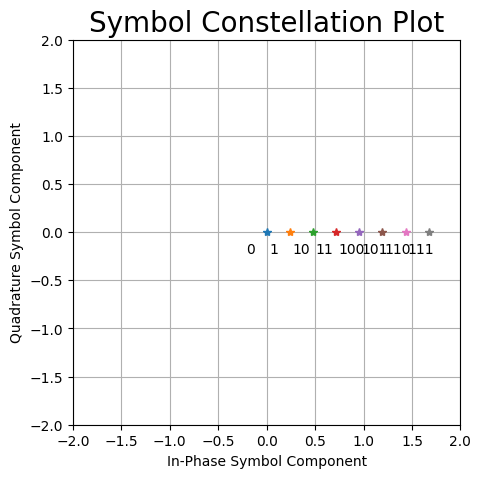

In [ ]:
################################
# AMPLITUDE SHIFT KEYING (ASK) #
################################
#
ask_2 = modems.ldapm(mod_type='ask', mod_order=2)
ask_4 = modems.ldapm(mod_type='ask', mod_order=4)
ask_8 = modems.ldapm(mod_type='ask', mod_order=8)

plotSignal(ask_2)
plotSignal(ask_4)
plotSignal(ask_8)

<html>
    <body>
        <b>Phase Shift Keying (PSK)</b>
        <p>Phase shift keying is a form of signal modulation that encodes digital data as variations of the phase of a carrier wave. No changes are made to amplitude as information is encoded. Phase modulation, in contrast to amplitude modulation, is more immune to noise and often produces high quality results at the receiver.</p>
       <p>
       Similar to amplitude modulation, phase modulation can be modulated in various "orders." The number of the order represents the amount of symbols that can be encoded in a single period of an encoded signal.
       </p>
    </body>
        
</html>

In [ ]:
############################
# PHASE SHIFT KEYING (PSK) #
############################
#
psk_2 = modems.ldapm(mod_type='psk', mod_order=2)
psk_4 = modems.ldapm(mod_type='psk', mod_order=4)
psk_8 = modems.ldapm(mod_type='psk', mod_order=8)

plotSignal(psk_2)
plotSignal(psk_4)
plotSignal(psk_8)

<html>
    <body>
        <b>Quadrature Amplitude Modulation (QAM)</b>
        <p>Quadrature amplitude modulation is a form of signal modulation that encodes digital data as variations of the amplitude and phase of a carrier wave. Quadrature amplitude modulation encodes the information into the amplitude of two seperate carrier waves. It then shifts the phase of one of those waves by 90 degrees. The two waves are then added together. Due to the variation of phase and amplitude the amount of information encoded is far more than amplitude or phase modulation alone.</p>
       <p>
       Similar to both amplitude modulation and phase modulation, quadrature amplitude modulation can be modulated in various "orders." The number of the order represents the amount of symbols that can be encoded in a single period of an encoded signal.
       </p>
    </body>
        
</html>

In [ ]:
###################################
# QUADRATURE AMPLITUDE MODULATION #
###################################
#
qam_8  = modems.ldapm(mod_type='qam', mod_order=8)
qam_16 = modems.ldapm(mod_type='qam', mod_order=16)
qam_64 = modems.ldapm(mod_type='qam', mod_order=64)

plotSignal(qam_8)
plotSignal(qam_16)
plotSignal(qam_64)

<html>
    <body>
        <b>Modulation and Encoding</b>
        <p>The below function <b><i>modems.ldapm</i></b> generates the signal data structure as shown above. This defines the type of modulation and the order that is being used. Thereafter a built in function that's part of the signal's data structure <b><i>gen_symbs(x)</i></b> generates a random string of symbols that is of size <b><i>x</b></i>. This is equivalent to a random series of bits.</p>
        <p>Thereafter the random series of symbols is encoded into an equivalent cosine signal by utilizing the <b><i>get_samps(randomSymbols)</b></i> function. This function automatically generates a cosine wave that is the sum of two modulated amplitude signals. This function would perform a similarly if amplitude modulation or phase modulation were selected. In this example only 10 symbols are encoded and as such the resultant cosine signal remains small. However, this can be extended to a signal with a surplus of symbols if the variable <i><b>x</b></i> is changed.</p>
        <p>In order to see how the cosine signal distributes energy over the set of frequencies a fourier transform is performed below as well. This is not relevant for generating training data, however it is reproduced below as a supplement to the tutorials content.</p>
        <p><b>Disclaimer</b></p>
        <p>For the remainder of the tutorial we will use a quadrature amplitude modulated signal with an order of 16. This choice is arbitrary, and changing the below code to support different types of modulation and order is trivial. By changing the modulation variable to 'ask' or 'psk' and setting the order is all that needs to be done to reproduce the results below for other signals.</p>
    </body>
        
</html>

In [ ]:
####################
# LDAPM GENERATION #
####################
#
# Variables that can be changed
modulation = 'qam'
order = 16

# Generation Variables that are changed but left alone in the tutorial
samples = 10
x = 10
beta = 0.75
span = 10
totalSamples = 10

# Generate random message to send
qam_16 = modems.ldapm(sps=samples, mod_type=modulation, mod_order=order, filt_type='rc', beta=beta, span=span, trim=1)
randomSymbols = qam_16.gen_symbs(x) # Amount of total symbols

# Turn random samples into Raised Cosine Pulses
pulses = qam_16.get_samps(randomSymbols)

# Plot cosine pulses real component
plotCosinePulsesReal(pulses, samples, totalSamples)

# Plot cosine pulses imaginary component
plotCosinePulsesImaginary(pulses, samples, totalSamples)

# Plot Power Spectral Density
plotFourierTransform(pulses)

<html>
    <body>
        <b>Carrier Modulation</b>
        <p>Before transmitting the signal must be first modulated by the carrier frequency. The carrier frequency is the base frequency that is encoded with information by the generated cosine signal shown above. The carrier frequency is usually a higher frequency then the raised cosine signal. However, the value of the carrier frequency is arbitrary and can be set to nearly any value. In this example we have a carrier frequency of 10 Hz.</p>
        <p>After being modulated by the carrier frequency the signal is ready to be transmitted. This ready to transmit signal is reproduced below in the following figures.</p>
        <p>We have reproduced a circuit diagram below to showcase the place of the carrier frequency in a generated quadrature amplitude modulated signal as a reference.</p>
        <img src="https://www.ednasia.com/wp-content/uploads/sites/3/2020/04/Witte_blog11_QM_Fig2_Quadrature_modulator.png">
    </body>
        
</html>

In [ ]:
# Carrier Frequency
carrierFreq = 0.1

# Modulate with the carrier signal
modulated = channels.freq_off(pulses, carrierFreq)

# Plot modulated real portion
plotCarrierModulationReal(modulated, samples, totalSamples)

# Plot modulated imaginary portion
plotCarrierModulationImaginary(modulated, samples, totalSamples)

<html>
    <body>
        <b>Gaussian Noise</b>
        <p>All signals have innate noise that occurs on the RF front end of the receiver. To simulate this, gaussian noise is added to the modulated signal utilizing the <b><i>channels.awgn</i></b> function. The <b><i>awgn</i></b> function is a Python fuction that implements an Additive White Gaussian Noise (AWGN) model - a simple noise model that is commonly used in simulating communication systems.</p>
    </body>
</html>

In [ ]:
# SNR ratio
snr = 10

# Adding noise
pulsesWithNoise = channels.awgn(pulses, snr, 1.0)

# Plot signals with nosie, plot real
plotCosinePulsesReal(pulsesWithNoise, samples, totalSamples)

# Plot signals with nosie, plot imaginary
plotCosinePulsesImaginary(pulsesWithNoise, samples, totalSamples)

# Get the original symbols
receiver = qam_16.get_symbs(pulsesWithNoise)

## Understanding Signal-to-Noise Ratio (SNR)

### Why is SNR Important?

The SNR determines how well a signal can be detected or decoded from noise, which exists in all communication systems. Understanding how to manipulate and measure SNR can greatly enhance the performance of a system by improving accuracy and reliability.

The code will demonstrate:
- **Generate a Basic Signal**: We will create a simple sinusoidal signal which represents a clean, unobstructed transmission.
- **Introduce Noise**: Add varying levels of Gaussian noise to simulate real-world conditions.
- **Visualize the Impact**: Using a slider, you will adjust the SNR value and observe how it affects the signal visually. This will help you understand the practical implications of SNR in signal processing.


In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Define a function to generate a basic signal
def generate_signal(freq, amplitude, time, phase):
    return amplitude * np.sin(2 * np.pi * freq * time + phase)

# Define a function to add noise to the signal
def add_noise(signal, snr):
    # Convert SNR from dB to a linear ratio
    snr_linear = 10 ** (snr / 10)
    # Calculate signal power and the required noise power for the given SNR
    signal_power = np.mean(np.abs(signal) ** 2)
    noise_power = signal_power / snr_linear
    # Generate noise with the calculated power
    noise = np.sqrt(noise_power) * np.random.normal(size=signal.shape)
    return signal + noise

# Define parameters for the signal
frequency = 1.0  # frequency of the signal
amplitude = 1.0  # amplitude of the signal
time = np.linspace(0, 1, 500)  # time vector
phase = 0  # phase of the signal

# Generate the signal
clean_signal = generate_signal(frequency, amplitude, time, phase)

# Interactive plot setup
from ipywidgets import interact, FloatSlider

def plot_signal(snr=10):
    noisy_signal = add_noise(clean_signal, snr)
    plt.figure(figsize=(10, 4))
    plt.plot(time, clean_signal, label='Clean Signal')
    plt.plot(time, noisy_signal, label='Noisy Signal', color='r')
    plt.title(f"Signal with SNR = {snr} dB")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid(True)
    plt.show()

# Create an interactive slider for SNR
interact(plot_signal, snr=FloatSlider(value=10, min=0, max=50, step=1, description='SNR (dB)'));


<html>
    <body>
        <b>Increasing Encoded Symbols</b>
        <p>In order for the neural network to classify and distinguish signals, for each signal we will be increasing the amount of randomly encoded symbols it transmits. By increasing the amount of randomly encoded symbols, the samples offset by the gaussian noise will cluster around a center point indexed by the quadrature symbol component and the in-phase component. This clustering can be labeled and classified - allowing the neural network the ability to distinguish between the type of modulation and the order of the modulation.</p>
    </body>
</html>

In [ ]:
# Variables
modulation = 'qam'
order = 4
samples = 10
totalSamples = 10000

# Generate random message to send
qam_16 = modems.ldapm(sps=samples, mod_type=modulation, mod_order=order, filt_type='rc', beta=beta, span=span, trim=1)
randomSymbols = qam_16.gen_symbs(totalSamples) # Amount of total symbols

# Turn random samples into Raised Cosine Pulses
pulses = qam_16.get_samps(randomSymbols)

# SNR ratio
snr = 10

# Adding noise
pulsesWithNoise = channels.awgn(pulses, snr, 1.0)

# Plot signals with nosie, plot real
plotCosinePulsesReal(pulsesWithNoise, samples, totalSamples)

# Plot signals with nosie, plot imaginary
plotCosinePulsesImaginary(pulsesWithNoise, samples, totalSamples)

# Get the original symbols
receiver = qam_16.get_symbs(pulsesWithNoise)

# Plots the demodulated signal
plotDemodulate(receiver, qam_16)

<html>
    <body>
        <b>Generating Training Data</b>
        <p>In order to generate training data, we created some easy to understand functions that generate 48,000 unique signals that contain 10,000 symbols each. The amount of unique signals that can be generated can be modified, and the next tutorial uses a smaller amount of signals to train the model than the amount used in this tutorial.</p>
        <p>The composition of the training data is 16,000 unique signals for each modulation type (ASK, PSK, QAM) in which each 16,000 is composed of 1,000 signals for each modulation order from 1 to 16.
    </body>
</html>

In [ ]:
def generateSignalWithNoise(modulationType, order, samples, totalSamples):

    beta = 0.75
    span = 10

    # Variables
    samples = 10
    totalSamples = 10000

    # Generate clean signal
    signal = modems.ldapm(sps=samples, mod_type=modulationType, mod_order=order, filt_type='rc', beta=beta, span=span, trim=1)

    # Generate random symbols to encode
    randomSymbols = signal.gen_symbs(totalSamples) # Amount of total symbols

    # Turn random samples into Raised Cosine Pulses
    pulses = psk_4.get_samps(randomSymbols)

    # SNR ratio
    snr = 10

    # Adding noise
    pulsesWithNoise = channels.awgn(pulses, snr, 1.0)

    return pulsesWithNoise

def generateSignalBulk(signalDict, modulationType, maxOrder, maxIteration, samples, totalSamples):

    for order in range(1, maxOrder):

        for i in range(0, maxIteration):

            key = (modulationType, order, i)

            signalDict[key] = generateSignalWithNoise(modulationType, order, samples, totalSamples)

    return signalDict

def generateAllSignals():

    # Variables
    samples = 10
    totalSamples = 10000

    # Iteration Variables
    signalDict = {}
    maxIteration = 1000

    print("START GENERATION")

    signalDict = generateSignalBulk(signalDict, 'psk', 16, maxIteration, samples, totalSamples)

    print("FINISH PSK")

    signalDict = generateSignalBulk(signalDict, 'ask', 16, maxIteration, samples, totalSamples)

    print("FINISH ASK")

    signalDict = generateSignalBulk(signalDict, 'qam', 16, maxIteration, samples, totalSamples)

    print("FINISH QAM")

    print(signalDict)

generateAllSignals()

START GENERATION
FINISH PSK


/content/src/src/modems.py:31: RuntimeWarning: invalid value encountered in divide
  self.symb_table = np.divide(self.symb_table, np.mean(np.abs(self.symb_table)**2.0)**(1.0/2.0))


FINISH ASK
